In [1]:
!pip install -U gensim
!pip install contractions
!pip install swifter
!pip install wordcloud
!pip install textblob

In [2]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
model = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

from nltk import word_tokenize, pos_tag

nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
nltk.download('stopwords')
import swifter 
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
from operator import itemgetter

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn import naive_bayes # .MultinomialNB
from sklearn.naive_bayes import MultinomialNB

from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import contractions

In [4]:
f = open(r"C:\Users\lenovo\Downloads\complaints-2021-05-14_08_16.json") 
  
data = json.loads(f.read())
df=pd.json_normalize(data)

In [5]:
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [6]:
df.shape

(78313, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [8]:
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [9]:
#Assign new column names
zip_iterator = zip(list(df.columns), [(x.replace("_","")).replace("source.","") for x in list(df.columns)])
df.rename(columns=dict(zip_iterator), inplace=True)
df.rename(columns={"complaintwhathappened":"complaints"},inplace=True)

#changes column names
df.columns 

Index(['index', 'type', 'id', 'score', 'tags', 'zipcode', 'complaintid',
       'issue', 'datereceived', 'state', 'consumerdisputed', 'product',
       'companyresponse', 'company', 'submittedvia', 'datesenttocompany',
       'companypublicresponse', 'subproduct', 'timely', 'complaints',
       'subissue', 'consumerconsentprovided'],
      dtype='object')

In [10]:
df.isna().sum()

index                          0
type                           0
id                             0
score                          0
tags                       67413
zipcode                     6757
complaintid                    0
issue                          0
datereceived                   0
state                       1991
consumerdisputed               0
product                        0
companyresponse                0
company                        0
submittedvia                   0
datesenttocompany              0
companypublicresponse      78309
subproduct                 10571
timely                         0
complaints                     0
subissue                   46297
consumerconsentprovided     1008
dtype: int64

In [11]:
(df[:] == "").sum() 

index                          0
type                           0
id                             0
score                          0
tags                           0
zipcode                        0
complaintid                    0
issue                          0
datereceived                   0
state                          0
consumerdisputed               0
product                        0
companyresponse                0
company                        0
submittedvia                   0
datesenttocompany              0
companypublicresponse          0
subproduct                     0
timely                         0
complaints                 57241
subissue                       0
consumerconsentprovided        0
dtype: int64

In [12]:
df.replace("", np.nan , inplace=True)

In [13]:
df.isna().sum()

index                          0
type                           0
id                             0
score                          0
tags                       67413
zipcode                     6757
complaintid                    0
issue                          0
datereceived                   0
state                       1991
consumerdisputed               0
product                        0
companyresponse                0
company                        0
submittedvia                   0
datesenttocompany              0
companypublicresponse      78309
subproduct                 10571
timely                         0
complaints                 57241
subissue                   46297
consumerconsentprovided     1008
dtype: int64

In [14]:
df.isna().sum()/len(df.index)*100

index                       0.000000
type                        0.000000
id                          0.000000
score                       0.000000
tags                       86.081493
zipcode                     8.628197
complaintid                 0.000000
issue                       0.000000
datereceived                0.000000
state                       2.542362
consumerdisputed            0.000000
product                     0.000000
companyresponse             0.000000
company                     0.000000
submittedvia                0.000000
datesenttocompany           0.000000
companypublicresponse      99.994892
subproduct                 13.498397
timely                      0.000000
complaints                 73.092590
subissue                   59.117899
consumerconsentprovided     1.287143
dtype: float64

In [15]:
df.dropna(inplace = True, subset=["complaints"])

In [16]:
df.isna().sum()

index                          0
type                           0
id                             0
score                          0
tags                       17256
zipcode                     4645
complaintid                    0
issue                          0
datereceived                   0
state                        143
consumerdisputed               0
product                        0
companyresponse                0
company                        0
submittedvia                   0
datesenttocompany              0
companypublicresponse      21070
subproduct                  2109
timely                         0
complaints                     0
subissue                    8176
consumerconsentprovided        0
dtype: int64

In [17]:
df.shape

(21072, 22)

In [18]:
21072/78313 * 100

26.90741000855541

In [19]:
df["complaints"].iloc[1]

'I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX   changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.'

In [20]:
def cleanText(text):
  text = text.lower()
  text = re.sub(r'\[|\]',"",text)    # Removing text in square brackets 
  text = re.sub(r'[^\w\s]',"",text)  # Removing punctuation
  text = re.sub(r'\w*\d\w*',"",text) # Removing words containing numbers
  return " ".join(text.split())  # Removing unwanted empty spacs 

df["complaints"] = df["complaints"].swifter.apply(cleanText) 

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [21]:
df["complaints"].iloc[1]

'i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me'

In [22]:
def check_word_frequency(text):
    return len(str(text).split(' '))

In [23]:
df['word_freq_complaints'] = df['complaints'].apply(check_word_frequency)
df['word_freq_complaints'].describe()

count    21072.000000
mean       243.966211
std        259.961767
min          1.000000
25%         93.000000
50%        175.000000
75%        308.000000
max       5276.000000
Name: word_freq_complaints, dtype: float64

In [24]:
sw = stopwords.words('english')

lem = WordNetLemmatizer()

# get Lemmatized text 
def lemmatize_text(text):     
    lemmatized = []
    doc = nlp(text)
    for word in doc:
        lemmatized.append(word.lemma_)        
    return " ".join(lemmatized)

# get nouns 
def get_nouns(text):
    blob = TextBlob(text)
    return ' '.join([ word for (word,tag) in blob.tags if tag == "NN"])


In [25]:
df['lemmatized complaints'] =  df['complaints'].swifter.apply(lemmatize_text)
df['lemmatized complaints'] =  df['lemmatized complaints'].swifter.apply(get_nouns)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [26]:
df_clean = df[['complaints' , 'lemmatized complaints']].copy()
df_clean.head()

,complaints,lemmatized complaints
1,good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service ask ...
2,i upgraded my xxxx xxxx card in and was told b...,card agent upgrade date agent information orde...
10,chase card was reported on however fraudulent ...,card report application identity consent servi...
11,on while trying to book a xxxx xxxx ticket i c...,try book xxxx ticket offer ticket card informa...
14,my grand son give me check for i deposit it in...,son chase account fund bank account pay money ...


In [27]:
def extract_POS_tags(text):
  nouns =  [token for token, pos in pos_tag(word_tokenize(text)) if pos.startswith('N')]
  return ' '.join(nouns)

In [28]:
df_clean['complaint_POS_removed'] =  df['lemmatized complaints'].swifter.apply(extract_POS_tags)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [29]:
df_clean.head()

,complaints,lemmatized complaints,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service ask ...,morning name bank cardmember service debt veri...
2,i upgraded my xxxx xxxx card in and was told b...,card agent upgrade date agent information orde...,card agent date agent information order accoun...
10,chase card was reported on however fraudulent ...,card report application identity consent servi...,report application identity consent service cr...
11,on while trying to book a xxxx xxxx ticket i c...,try book xxxx ticket offer ticket card informa...,book xxxx ticket offer ticket card information...
14,my grand son give me check for i deposit it in...,son chase account fund bank account pay money ...,son chase account fund bank account money son ...


In [30]:
##Exploratory data analysis to get familiar with the data.

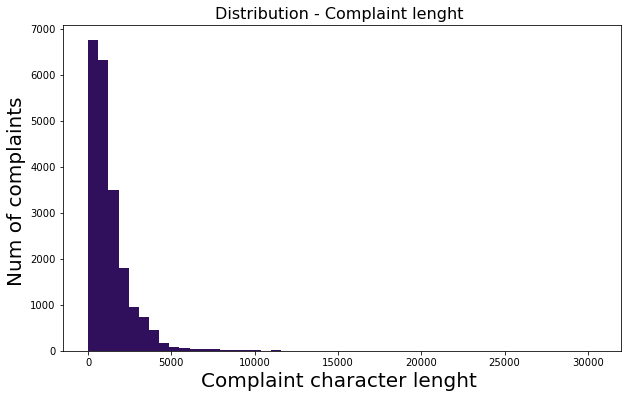

In [31]:
df_clean["complaint_length"] = df_clean["complaints"].apply(len)

fig = plt.figure(figsize=(10,6))

plt.hist(df_clean['complaint_length'],bins=50,color='#30105C')

plt.title('Distribution - Complaint lenght ', fontsize=16)
plt.ylabel('Num of complaints ', fontsize=20)
plt.xlabel('Complaint character lenght ', fontsize=20)

plt.show()

In [32]:
!pip install --upgrade pip 

!pip install --upgrade Pillow
!-m PIL
!-m PIL | grep -i type

'-m' is not recognized as an internal or external command,
operable program or batch file.
'-m' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

In [34]:
df_clean

,complaints,lemmatized complaints,complaint_POS_removed,complaint_length,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service ask ...,morning name bank cardmember service debt veri...,469,morning name bank cardmember service debt veri...
2,i upgraded my xxxx xxxx card in and was told b...,card agent upgrade date agent information orde...,card agent date agent information order accoun...,334,card agent date agent information order accoun...
10,chase card was reported on however fraudulent ...,card report application identity consent servi...,report application identity consent service cr...,209,report application identity consent service cr...
11,on while trying to book a xxxx xxxx ticket i c...,try book xxxx ticket offer ticket card informa...,book xxxx ticket offer ticket card information...,1424,book xxxx ticket offer ticket card information...
14,my grand son give me check for i deposit it in...,son chase account fund bank account pay money ...,son chase account fund bank account money son ...,452,son chase account fund bank account money son ...
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,card customer decade solicitation credit card ...,card customer decade solicitation credit card ...,639,card customer decade solicitation credit card ...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,visa credit card provider claim purchase prote...,visa credit card provider claim purchase prote...,2055,visa credit card provider claim purchase prote...
78310,i am not familiar with xxxx pay and did not un...,pay risk provide consumer bank app chase year ...,pay risk consumer bank year banking merchant m...,2294,pay risk consumer bank year banking merchant m...
78311,i have had flawless credit for yrs ive had cha...,credit yrs credit card chase freedom xxxx prob...,credit yrs credit card chase freedom xxxx prob...,1961,credit yrs credit card chase freedom xxxx prob...


In [35]:
def get_top_unigrams(text, n=None):
    vec = CountVectorizer(stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [36]:
common_words = get_top_unigrams(df_clean['Complaint_clean'].values.astype('U'), 30)
unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
unigram.head(10)

,unigram,count
0,account,41711
1,credit,34152
2,chase,33376
3,xxxx,30961
4,bank,28412
5,card,25689
6,payment,21170
7,time,16011
8,charge,14678
9,day,12976


In [37]:
def get_top_trigrams(text, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [38]:
common_words = get_top_trigrams(df_clean['Complaint_clean'].values.astype('U'), 30)
trigram = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
trigram.head(10)

,bigram,count
0,chase credit card,1894
1,credit card company,1010
2,credit card account,875
3,credit card credit,596
4,credit card chase,528
5,credit report credit,476
6,charge credit card,447
7,account credit card,447
8,inquiry credit report,420
9,card credit card,418


In [39]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

def remove_allXX(text):
  return re.sub('[x]{2,}',"",text)

df_clean['Complaint_clean'] = df_clean['Complaint_clean'].apply(remove_allXX)

In [40]:
df_clean

,complaints,lemmatized complaints,complaint_POS_removed,complaint_length,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service ask ...,morning name bank cardmember service debt veri...,469,morning name bank cardmember service debt veri...
2,i upgraded my xxxx xxxx card in and was told b...,card agent upgrade date agent information orde...,card agent date agent information order accoun...,334,card agent date agent information order accoun...
10,chase card was reported on however fraudulent ...,card report application identity consent servi...,report application identity consent service cr...,209,report application identity consent service cr...
11,on while trying to book a xxxx xxxx ticket i c...,try book xxxx ticket offer ticket card informa...,book xxxx ticket offer ticket card information...,1424,book ticket offer ticket card information min...
14,my grand son give me check for i deposit it in...,son chase account fund bank account pay money ...,son chase account fund bank account money son ...,452,son chase account fund bank account money son ...
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,card customer decade solicitation credit card ...,card customer decade solicitation credit card ...,639,card customer decade solicitation credit card ...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,visa credit card provider claim purchase prote...,visa credit card provider claim purchase prote...,2055,visa credit card provider claim purchase prote...
78310,i am not familiar with xxxx pay and did not un...,pay risk provide consumer bank app chase year ...,pay risk consumer bank year banking merchant m...,2294,pay risk consumer bank year banking merchant m...
78311,i have had flawless credit for yrs ive had cha...,credit yrs credit card chase freedom xxxx prob...,credit yrs credit card chase freedom xxxx prob...,1961,credit yrs credit card chase freedom problem ...


In [41]:
##Feature Extraction

In [42]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [43]:
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])

In [44]:
##Topic Modelling using NMF

In [45]:
from sklearn.decomposition import NMF

# Use Gensim's NMF to get the best num of topics via coherence score
texts = df_clean['Complaint_clean']
dataset = [d.split() for d in texts]

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(dataset)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in dataset]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 10, 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics)

C:\Users\lenovo\anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\lenovo\anaconda3\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning:

invalid value encountered in double_scalars



5


In [46]:
##Manual Topic Modeling

In [47]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5 #write the value you want to test out

#keep the random_state =40
nmf_model = NMF(n_components=5, random_state=40) #write your code here

In [48]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names())

5798

In [49]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['transfer', 'customer', 'claim', 'business', 'number', 'transaction', 'branch', 'day', 'chase', 'deposit', 'fund', 'check', 'money', 'bank', 'account']


THE TOP 15 WORDS FOR TOPIC #1
['balance', 'year', 'application', 'letter', 'debt', 'limit', 'information', 'score', 'company', 'account', 'chase', 'inquiry', 'report', 'card', 'credit']


THE TOP 15 WORDS FOR TOPIC #2
['history', 'car', 'year', 'mortgage', 'pay', 'credit', 'date', 'auto', 'time', 'day', 'fee', 'statement', 'month', 'balance', 'payment']


THE TOP 15 WORDS FOR TOPIC #3
['day', 'company', 'time', 'statement', 'service', 'claim', 'purchase', 'fraud', 'chase', 'merchant', 'dispute', 'transaction', 'fee', 'card', 'charge']


THE TOP 15 WORDS FOR TOPIC #4
['foreclosure', 'document', 'sale', 'bank', 'house', 'time', 'letter', 'rate', 'year', 'property', 'chase', 'modification', 'home', 'mortgage', 'loan']




In [50]:
topic_results = nmf_model.transform(dtm)
topic_results[0].round(2)
topic_results[0].argmax()
topic_results.argmax(axis=1)

array([0, 1, 1, ..., 3, 2, 2], dtype=int64)

In [51]:
df_clean['Topic'] = topic_results.argmax(axis=1)

In [52]:
df_clean.head()

,complaints,lemmatized complaints,complaint_POS_removed,complaint_length,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service ask ...,morning name bank cardmember service debt veri...,469,morning name bank cardmember service debt veri...,0
2,i upgraded my xxxx xxxx card in and was told b...,card agent upgrade date agent information orde...,card agent date agent information order accoun...,334,card agent date agent information order accoun...,1
10,chase card was reported on however fraudulent ...,card report application identity consent servi...,report application identity consent service cr...,209,report application identity consent service cr...,1
11,on while trying to book a xxxx xxxx ticket i c...,try book xxxx ticket offer ticket card informa...,book xxxx ticket offer ticket card information...,1424,book ticket offer ticket card information min...,1
14,my grand son give me check for i deposit it in...,son chase account fund bank account pay money ...,son chase account fund bank account money son ...,452,son chase account fund bank account money son ...,0


In [53]:
df_clean=df_clean.groupby('Topic').head(5)
df_clean.sort_values('Topic')

,complaints,lemmatized complaints,complaint_POS_removed,complaint_length,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service ask ...,morning name bank cardmember service debt veri...,469,morning name bank cardmember service debt veri...,0
14,my grand son give me check for i deposit it in...,son chase account fund bank account pay money ...,son chase account fund bank account money son ...,452,son chase account fund bank account money son ...,0
17,with out notice jp morgan chase restricted my ...,jp chase account debit card tuesday thursday b...,jp chase account debit card tuesday branch cus...,2221,jp chase account debit card tuesday branch cus...,0
24,mishandling of this account by chase auto and ...,mishandle account auto xxxx,mishandle account auto xxxx,50,mishandle account auto,0
27,i opened an account with chase bank on xxxx an...,account bank code bonus term everything accoun...,account bank code term everything account depo...,401,account bank code term everything account depo...,0
2,i upgraded my xxxx xxxx card in and was told b...,card agent upgrade date agent information orde...,card agent date agent information order accoun...,334,card agent date agent information order accoun...,1
10,chase card was reported on however fraudulent ...,card report application identity consent servi...,report application identity consent service cr...,209,report application identity consent service cr...,1
11,on while trying to book a xxxx xxxx ticket i c...,try book xxxx ticket offer ticket card informa...,book xxxx ticket offer ticket card information...,1424,book ticket offer ticket card information min...,1
15,can you please remove inquiry,inquiry,inquiry,29,inquiry,1
23,i have a chase credit card which is incorrectl...,chase credit card datum credit report company ...,chase credit card datum credit report company ...,127,chase credit card datum credit report company ...,1


In [54]:
#After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
#Bank Account services
#Credit card or prepaid card
#Theft/Dispute Reporting
#Mortgage/Loan
#Others

In [55]:
Topic_names = {0:"Bank Account services",
               1:"Credit card or prepaid card", 
               2:"Others",
               3:"Theft/Dispute Reporting",
               4:"Mortgage/Loan"  }
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14312\664239324.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
df_clean

,complaints,lemmatized complaints,complaint_POS_removed,complaint_length,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service ask ...,morning name bank cardmember service debt veri...,469,morning name bank cardmember service debt veri...,Bank Account services
2,i upgraded my xxxx xxxx card in and was told b...,card agent upgrade date agent information orde...,card agent date agent information order accoun...,334,card agent date agent information order accoun...,Credit card or prepaid card
10,chase card was reported on however fraudulent ...,card report application identity consent servi...,report application identity consent service cr...,209,report application identity consent service cr...,Credit card or prepaid card
11,on while trying to book a xxxx xxxx ticket i c...,try book xxxx ticket offer ticket card informa...,book xxxx ticket offer ticket card information...,1424,book ticket offer ticket card information min...,Credit card or prepaid card
14,my grand son give me check for i deposit it in...,son chase account fund bank account pay money ...,son chase account fund bank account money son ...,452,son chase account fund bank account money son ...,Bank Account services
15,can you please remove inquiry,inquiry,inquiry,29,inquiry,Credit card or prepaid card
17,with out notice jp morgan chase restricted my ...,jp chase account debit card tuesday thursday b...,jp chase account debit card tuesday branch cus...,2221,jp chase account debit card tuesday branch cus...,Bank Account services
20,during the summer months i experience a declin...,summer month income employment month payment e...,summer month income employment month payment e...,1342,summer month income employment month payment e...,Others
21,on xxxx i made a payment to an online retailer...,xxxx payment online retailer use pay xxxx chas...,payment online retailer use pay xxxx chase web...,3444,payment online retailer use pay chase website...,Theft/Dispute Reporting
23,i have a chase credit card which is incorrectl...,chase credit card datum credit report company ...,chase credit card datum credit report company ...,127,chase credit card datum credit report company ...,Credit card or prepaid card


In [57]:
##Supervised model to predict any new complaints to the relevant Topics.

In [58]:
Topic_names = { "Bank Account services":0,
               "Credit card or prepaid card":1,
               "Others":2,
               "Theft/Dispute Reporting":3,
               "Mortgage/Loan":4 }
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14312\3835382848.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
df_clean

,complaints,lemmatized complaints,complaint_POS_removed,complaint_length,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service ask ...,morning name bank cardmember service debt veri...,469,morning name bank cardmember service debt veri...,0
2,i upgraded my xxxx xxxx card in and was told b...,card agent upgrade date agent information orde...,card agent date agent information order accoun...,334,card agent date agent information order accoun...,1
10,chase card was reported on however fraudulent ...,card report application identity consent servi...,report application identity consent service cr...,209,report application identity consent service cr...,1
11,on while trying to book a xxxx xxxx ticket i c...,try book xxxx ticket offer ticket card informa...,book xxxx ticket offer ticket card information...,1424,book ticket offer ticket card information min...,1
14,my grand son give me check for i deposit it in...,son chase account fund bank account pay money ...,son chase account fund bank account money son ...,452,son chase account fund bank account money son ...,0
15,can you please remove inquiry,inquiry,inquiry,29,inquiry,1
17,with out notice jp morgan chase restricted my ...,jp chase account debit card tuesday thursday b...,jp chase account debit card tuesday branch cus...,2221,jp chase account debit card tuesday branch cus...,0
20,during the summer months i experience a declin...,summer month income employment month payment e...,summer month income employment month payment e...,1342,summer month income employment month payment e...,2
21,on xxxx i made a payment to an online retailer...,xxxx payment online retailer use pay xxxx chas...,payment online retailer use pay xxxx chase web...,3444,payment online retailer use pay chase website...,3
23,i have a chase credit card which is incorrectl...,chase credit card datum credit report company ...,chase credit card datum credit report company ...,127,chase credit card datum credit report company ...,1


In [60]:
training_data= df_clean[["complaints","Topic"]]

In [61]:
training_data

,complaints,Topic
1,good morning my name is xxxx xxxx and i apprec...,0
2,i upgraded my xxxx xxxx card in and was told b...,1
10,chase card was reported on however fraudulent ...,1
11,on while trying to book a xxxx xxxx ticket i c...,1
14,my grand son give me check for i deposit it in...,0
15,can you please remove inquiry,1
17,with out notice jp morgan chase restricted my ...,0
20,during the summer months i experience a declin...,2
21,on xxxx i made a payment to an online retailer...,3
23,i have a chase credit card which is incorrectl...,1


In [62]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data['complaints'])

#Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.Topic, test_size=0.25, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (18, 898)
Shape of y_train: (18,)
Shape of X_test: (7, 898)
Shape of y_test: (7,)


In [64]:
def eval_model(y_test, y_pred, model_name):
  
    print(f"CLASSIFICATION REPORT for {model_name}\n")
    print(classification_report(y_test, y_pred, target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting",
"Mortgage/Loan"]))
    
    
    return

In [65]:
model_name = 'LOGISTIC REGRESSION'
clf_lr = LogisticRegression(solver='liblinear')
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

In [66]:
f1_lr = f1_score(y_test, y_pred_lr, average="weighted")
f1_lr

0.0

In [67]:
clf_lr_tuned = LogisticRegression(C=1, 
                                  penalty='l1', 
                                  solver='saga') 
clf_lr_tuned.fit(X_train, y_train)
y_pred_lr_tuned = clf_lr_tuned.predict(X_test)

In [68]:
f1_lr_tuned = f1_score(y_test, y_pred_lr_tuned, average="weighted")
f1_lr_tuned

0.0

In [69]:
eval_model(y_test, y_pred_lr_tuned, model_name)

CLASSIFICATION REPORT for LOGISTIC REGRESSION

                             precision    recall  f1-score   support

      Bank Account services       0.00      0.00      0.00       2.0
Credit card or prepaid card       0.00      0.00      0.00       1.0
                     Others       0.00      0.00      0.00       2.0
    Theft/Dispute Reporting       0.00      0.00      0.00       2.0
              Mortgage/Loan       0.00      0.00      0.00       0.0

                   accuracy                           0.00       7.0
                  macro avg       0.00      0.00      0.00       7.0
               weighted avg       0.00      0.00      0.00       7.0



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` p

In [70]:
summary = pd.DataFrame([{'Model': 'Logistic Regression','F1 Score (untuned)': round(f1_lr, 2), 'F1 Score (tuned)': round(f1_lr_tuned, 2)}])
summary

,Model,F1 Score (untuned),F1 Score (tuned)
0,Logistic Regression,0.0,0.0


In [71]:
model_name = 'DECISION TREE'
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

In [72]:
f1_dt = f1_score(y_test, y_pred_dt, average="weighted")
f1_dt

0.6428571428571429

In [73]:
clf_dt_tuned = DecisionTreeClassifier(criterion='gini', 
                                      max_depth=30, 
                                      min_samples_leaf=15, 
                                      max_features=None)

clf_dt_tuned.fit(X_train, y_train)
y_pred_dt_tuned = clf_dt_tuned.predict(X_test)

In [74]:
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned, average="weighted")
f1_dt_tuned

0.0

In [75]:
eval_model(y_test, y_pred_dt_tuned, model_name)

CLASSIFICATION REPORT for DECISION TREE

                             precision    recall  f1-score   support

      Bank Account services       0.00      0.00      0.00       2.0
Credit card or prepaid card       0.00      0.00      0.00       1.0
                     Others       0.00      0.00      0.00       2.0
    Theft/Dispute Reporting       0.00      0.00      0.00       2.0
              Mortgage/Loan       0.00      0.00      0.00       0.0

                   accuracy                           0.00       7.0
                  macro avg       0.00      0.00      0.00       7.0
               weighted avg       0.00      0.00      0.00       7.0



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` p

In [76]:
summary.loc[len(summary.index)] = ['Decision Tree', round(f1_dt, 2), round(f1_dt_tuned, 2)]
summary

,Model,F1 Score (untuned),F1 Score (tuned)
0,Logistic Regression,0.00,0.0
1,Decision Tree,0.64,0.0


In [77]:
model_name = 'RANDOM FOREST'
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

In [78]:
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")
f1_rf

0.04761904761904762

In [79]:
clf_rf_tuned = RandomForestClassifier(n_estimators=100, 
                                      min_samples_split=5, 
                                      min_samples_leaf=5, 
                                      max_features=None, 
                                      max_depth=30, 
                                      criterion='gini'
)

clf_rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = clf_rf_tuned.predict(X_test)

In [80]:
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, average="weighted")
f1_rf_tuned

0.05714285714285715

In [81]:
eval_model(y_test, y_pred_rf_tuned, model_name)

CLASSIFICATION REPORT for RANDOM FOREST

                             precision    recall  f1-score   support

      Bank Account services       0.00      0.00      0.00         2
Credit card or prepaid card       0.25      1.00      0.40         1
                     Others       0.00      0.00      0.00         2
    Theft/Dispute Reporting       0.00      0.00      0.00         2
              Mortgage/Loan       0.00      0.00      0.00         0

                   accuracy                           0.14         7
                  macro avg       0.05      0.20      0.08         7
               weighted avg       0.04      0.14      0.06         7



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` p

In [82]:
summary.loc[len(summary.index)] = ['Random Forest', round(f1_rf, 2), round(f1_rf_tuned, 2)]
summary

,Model,F1 Score (untuned),F1 Score (tuned)
0,Logistic Regression,0.00,0.00
1,Decision Tree,0.64,0.00
2,Random Forest,0.05,0.06


In [83]:
model_name = 'NAIVE BAYES'
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)

In [84]:
f1_nb = f1_score(y_test, y_pred_nb, average="weighted")
f1_nb

0.0

In [85]:
clf_nb_tuned = MultinomialNB(alpha=0.1, fit_prior=False)
clf_nb_tuned.fit(X_train, y_train)
y_pred_nb_tuned = clf_nb_tuned.predict(X_test)

In [86]:
f1_nb_tuned = f1_score(y_test, y_pred_nb_tuned, average="weighted")
f1_nb_tuned

0.38095238095238093

In [87]:
eval_model(y_test, y_pred_nb_tuned, model_name)

CLASSIFICATION REPORT for NAIVE BAYES

                             precision    recall  f1-score   support

      Bank Account services       0.00      0.00      0.00         2
Credit card or prepaid card       0.50      1.00      0.67         1
                     Others       0.00      0.00      0.00         2
    Theft/Dispute Reporting       1.00      1.00      1.00         2
              Mortgage/Loan       0.00      0.00      0.00         0

                   accuracy                           0.43         7
                  macro avg       0.30      0.40      0.33         7
               weighted avg       0.36      0.43      0.38         7



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [88]:
summary.loc[len(summary.index)] = ['Naive Bayes', round(f1_nb, 2), round(f1_nb_tuned, 2)]
summary

,Model,F1 Score (untuned),F1 Score (tuned)
0,Logistic Regression,0.00,0.00
1,Decision Tree,0.64,0.00
2,Random Forest,0.05,0.06
3,Naive Bayes,0.00,0.38


In [89]:
####The best model is Random forest with 0.4 untuned F1 score